In [72]:
import os

# Manually set the environment variables
os.environ["VISION_KEY"] = "8JKzGpabbAjjakJdpgaiDpWUcemTiX3OtJDnauvjUlngn5HKpk9yJQQJ99BCAC5RqLJXJ3w3AAAFACOGfpJN"
os.environ["VISION_ENDPOINT"] = "https://georgiana.cognitiveservices.azure.com/"

# Verify if the variables are set
print("VISION_KEY:", os.environ.get("VISION_KEY"))
print("VISION_ENDPOINT:", os.environ.get("VISION_ENDPOINT"))

VISION_KEY: 8JKzGpabbAjjakJdpgaiDpWUcemTiX3OtJDnauvjUlngn5HKpk9yJQQJ99BCAC5RqLJXJ3w3AAAFACOGfpJN
VISION_ENDPOINT: https://georgiana.cognitiveservices.azure.com/


In [73]:
import azure.ai
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

In [74]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

# EX 1.Sa se foloseasca un algoritm de clasificare a imaginilor (etapa de inferenta/testare) si sa se stabileasca performanta acestui algoritm de clasificare binara (imagini cu biciclete vs. imagini fara biciclete).

In [75]:
import os
import matplotlib.pyplot as plt
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

# Autentificare cu Azure AI Vision
subscription_key = os.getenv("VISION_KEY")
endpoint = os.getenv("VISION_ENDPOINT")
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

# Director cu imagini pentru clasificare
image_folder = "imagesLab4/"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

# Etichete reale (ground truth)
ground_truth = {
    "bike1.jpg": "bicycle",
    "bike02.jpg": "bicycle",
    "traffic01.jpg": "no_bicycle",
    "traffic02.jpg": "no_bicycle"
}

# Variabile pentru metrici de performanta
TP = FP = TN = FN = 0

# Clasificare imagini
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    with open(image_path, "rb") as img:
        result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.tags])
    
    # Verific daca etichetele contin „bicycle”
    detected_bicycle = any(tag.name.lower() == "bicycle" for tag in result.tags)
    predicted_label = "bicycle" if detected_bicycle else "no_bicycle"
    
    # Compar cu ground truth
    actual_label = ground_truth.get(image_file, "no_bicycle")
    
    if predicted_label == "bicycle" and actual_label == "bicycle":
        TP += 1  # Corect detectat ca fiind cu bicicleta
    elif predicted_label == "bicycle" and actual_label == "no_bicycle":
        FP += 1  # Fals pozitiv
    elif predicted_label == "no_bicycle" and actual_label == "no_bicycle":
        TN += 1  # Corect detectat ca fara bicicleta
    elif predicted_label == "no_bicycle" and actual_label == "bicycle":
        FN += 1  # Fals negativ

# Calcul metrici
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Afisare rezultate
print(f"Acuratete: {accuracy:.2f}")
print(f"Precizie: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")


Acuratețe: 0.60
Precizie: 0.20
Recall: 1.00
F1-score: 0.33


# Ex2. a. sa se localizeze automat bicicletele in aceste imagini si sa se evidentieze chenarele care incadreaza bicicletele

# Ex2. b. sa se eticheteze (fara ajutorul algoritmilor de AI) aceste imagini cu chenare care sa incadreze cat mai exact bicicletele. Care task dureaza mai mult (cel de la punctul a sau cel de la punctul b)?

# Ex2. c. sa se determine performanta algoritmului de la punctul a avand in vedere etichetarile realizate la punctul b (se vor folosi cel putin 2 metrici).

Etichetare manuală pentru bike02.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru bike03.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru bike04.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru bike05.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru bike06.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru bike07.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru bike08.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru bike09.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru bike1.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru bike10.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru traffic01.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru traffic02.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manuală pentru traffic03.jpg. Selectați regiunea și apăsați ENTER.
Etichetare manual

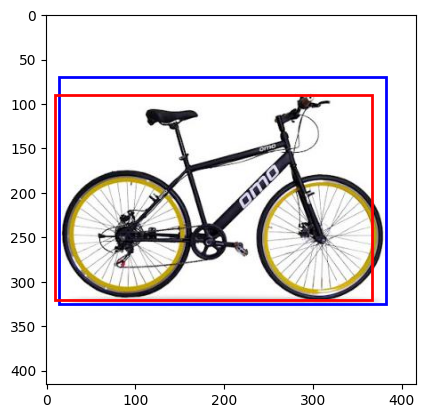

bike02.jpg - MSE: 280.50, IoU: 0.86


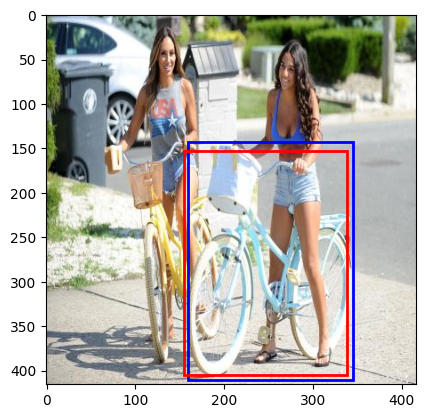

bike03.jpg - MSE: 95.25, IoU: 0.89


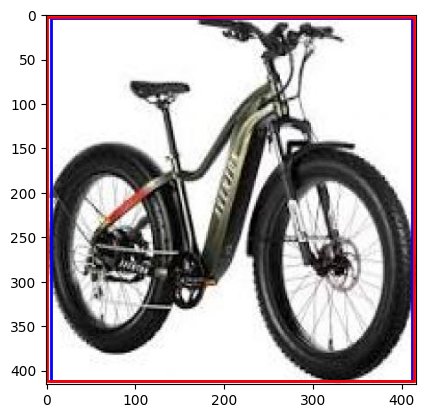

bike04.jpg - MSE: 22.75, IoU: 0.98


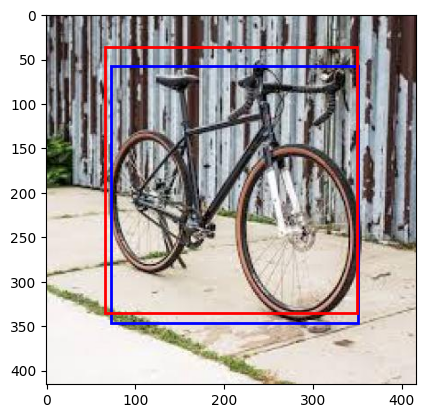

bike05.jpg - MSE: 143.50, IoU: 0.87
Nicio bicicletă detectată în bike06.jpg.


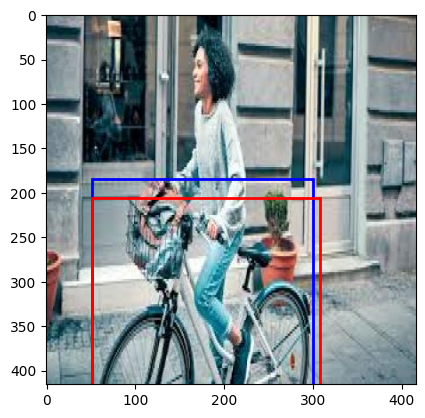

bike07.jpg - MSE: 258.00, IoU: 0.88
Nicio bicicletă detectată în bike08.jpg.


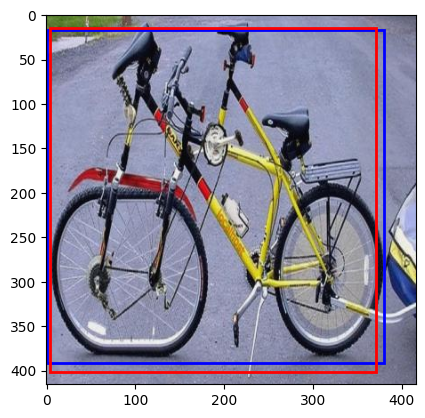

bike09.jpg - MSE: 89.50, IoU: 0.93


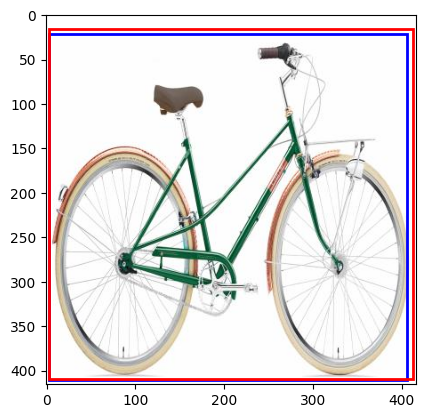

bike1.jpg - MSE: 19.25, IoU: 0.97


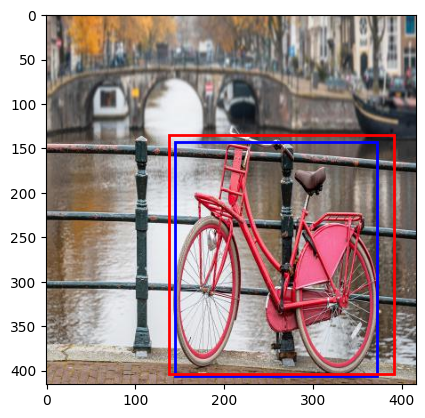

bike10.jpg - MSE: 206.25, IoU: 0.86
Nicio bicicletă detectată în traffic01.jpg.
Nicio bicicletă detectată în traffic02.jpg.
Nicio bicicletă detectată în traffic03.jpg.
Nicio bicicletă detectată în traffic04.jpg.
Nicio bicicletă detectată în traffic05.jpg.
Nicio bicicletă detectată în traffic06.jpg.
Nicio bicicletă detectată în traffic07.jpg.
Nicio bicicletă detectată în traffic08.jpg.
Nicio bicicletă detectată în traffic09.jpg.
Nicio bicicletă detectată în traffic10.jpg.
Detectare și comparare finalizate.


In [76]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

# Autentificare cu Azure AI Vision
subscription_key = os.getenv("VISION_KEY")
endpoint = os.getenv("VISION_ENDPOINT")
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

# Director cu imagini pentru detectarea bicicletelor
image_folder = "imagesLab4/"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

# Etichete reale (ground truth) pentru localizarea bicicletelor
manual_bounding_boxes = {}

def label_manual_bounding_boxes(image_path):
    image = cv2.imread(image_path)
    clone = image.copy()
    bbox = cv2.selectROI("Select Bicycle", clone, fromCenter=False, showCrosshair=True)
    cv2.destroyAllWindows()
    return [int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])]

def intersection_over_union(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0] + boxA[2], boxB[0] + boxB[2])
    yB = min(boxA[1] + boxA[3], boxB[1] + boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = boxA[2] * boxA[3]
    boxBArea = boxB[2] * boxB[3]
    
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

def draw_bounding_boxes(image_path, predicted_bb=None, actual_bb=None):
    image = plt.imread(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    
    if actual_bb:
        rect = patches.Rectangle((actual_bb[0], actual_bb[1]), actual_bb[2], actual_bb[3], 
                                 linewidth=2, edgecolor='blue', facecolor='none', label='Manual')
        ax.add_patch(rect)
    
    if predicted_bb:
        rect = patches.Rectangle((predicted_bb[0], predicted_bb[1]), predicted_bb[2], predicted_bb[3], 
                                 linewidth=2, edgecolor='red', facecolor='none', label='AI')
        ax.add_patch(rect)
    
    plt.show()

# Etichetare manuala
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    print(f"Etichetare manuala pentru {image_file}. Selectati regiunea si apasati ENTER.")
    manual_bounding_boxes[image_file] = label_manual_bounding_boxes(image_path)

# Detectare biciclete si comparare cu etichetele manuale
processed_images = set()
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    with open(image_path, "rb") as img:
        result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.objects])
    
    detected = False
    for obj in result.objects:
        if obj.object_property.lower() == "bicycle":
            detected = True
            predicted_bb = [obj.rectangle.x, obj.rectangle.y, obj.rectangle.w, obj.rectangle.h]
            actual_bb = manual_bounding_boxes.get(image_file, None)
            
            if image_file not in processed_images:
                draw_bounding_boxes(image_path, predicted_bb, actual_bb)
                processed_images.add(image_file)
            
            # Calcul eroare detecție (MSE)
            if actual_bb:
                mse_error = sum((pred - actual) ** 2 for pred, actual in zip(predicted_bb, actual_bb)) / 4
                iou_score = intersection_over_union(predicted_bb, actual_bb)
                
                print(f"{image_file} - MSE: {mse_error:.2f}, IoU: {iou_score:.2f}")
    
    if not detected:
        print(f"Nicio bicicleta detectata în {image_file}.")


print("Detectare si comparare finalizate.")
